![Project_3_Tittle3.png](Project_3_Tittle3.png)

## Background:

Cars4U is a used-car retailer based in New Delhi, India founded in 2017. In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. The prediction is that this market is going to continue growing. Although, this growing market offers many expansion opportunities for our business one of the lessons learned from the past year is the loss of profit due to inacurate pricing due to the uncertainty of the market.

### Objective:

The objective of this project is to develop and implement a mathematical pricing model that can effectively predict the price of used cars.


### Data Dictionary:

*	S.No.: Serial Number
*	Name: Name of the car which includes Brand name and Model name
*	Location: The location in which the car is being sold or is available for purchase Cities
*	Year: Manufacturing year of the car
*	Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in KM.
*	Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
*	Transmission: The type of transmission used by the car. (Automatic / Manual)
*	Owner: Type of ownership
*	Mileage: The standard mileage offered by the car company in kmpl or km/kg
*	Engine: The displacement volume of the engine in CC.
*	Power: The maximum power of the engine in bhp.
*	Seats: The number of seats in the car.
*	New_Price: The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
*	Price: The price of the used car in INR Lakhs (1 Lakh = 100, 000)

# 1 Loading the Libraries

In [1]:
import pandas as pd # Imports Pandas library for data manipulation and analisys
import numpy as np # Imports Numpy package for advance math operations
import seaborn as sns # Imports Seaborn Phython data vizualization library (popular & nicer charts)
sns.set (color_codes=True) # Adds a nice background to the graphs
import warnings # Imports the warnings (step 1 of 2 to ignore them)
warnings.filterwarnings("ignore") # This prevents the warnings from showing (step 2 of 2 to ignore them)
import matplotlib.pyplot as plt # Imports Matplotlib Python's sub-library for standard charts
# The line below instrucs Jupiter to show the chart within the same window 
%matplotlib inline
import statsmodels.api as sm # explores data, performs statistical tests and estimates statistical models
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.linear_model import LinearRegression # statistical model. Finds the relationship between a dependent variable (Y) with an independent variable or set of variables (X)
from sklearn.metrics import mean_squared_error# Standard deviation of the residuals to estimate how good is the model
pd.set_option('display.max_columns', None) #Removes the limit from the number of displayed columns so the entire width of the data frame is displayed.
pd.set_option('display.max_rows', 200) #Extends the the number of displayed rows to 200 so we can see access more data to review. More than this amount could crash the notebook.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #Calculates the square error to determine the efficiency of the model

# 2 Load and explore the data

## 2.1 Read the data file

In [2]:
# Reads the file. No need to indicate directory if the file in the same location as Jupiter notebook. 
# The first column is the index since it provides the same information
file_data = pd.read_csv('used_cars_data.csv',index_col=0)
print(f'There are {file_data.shape[0]} rows and {file_data.shape[1]} columns in the dataset') # f-string

There are 7253 rows and 13 columns in the dataset


In [3]:
data = file_data.copy() # Best practice to preserve the integrity of the raw data

## 2.2 Explore the data

In [4]:
np.random.seed(1) #Generates pseudo-randon rows. We get the same results every time. 
#Random displays gives us a better undertanding of the overall data formatting.
data.sample(n=10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50


In [5]:
data.head() #Prints the first 5 rows

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
data.tail() #Prints the last 5 rows

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [7]:
data.dtypes.value_counts() # This dataset has 9 columns with categorical data type and 4 columns with numeric data type

object     9
float64    2
int64      2
dtype: int64

In [8]:
data.info() # Below the details on the 13 columns, their respective data types, and also the presence of any null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
Name                 7253 non-null object
Location             7253 non-null object
Year                 7253 non-null int64
Kilometers_Driven    7253 non-null int64
Fuel_Type            7253 non-null object
Transmission         7253 non-null object
Owner_Type           7253 non-null object
Mileage              7251 non-null object
Engine               7207 non-null object
Power                7207 non-null object
Seats                7200 non-null float64
New_Price            1006 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


#### 2.2.1 Fixing data Types
* Most columns classified as objects will be changed to "category". This reduces the dataframe's storage space.

In [9]:
data["Name"]=data["Name"].astype("category")
data["Location"]=data["Location"].astype("category")
data["Fuel_Type"]=data["Fuel_Type"].astype("category")
data["Transmission"]=data["Transmission"].astype("category")
data["Owner_Type"]=data["Owner_Type"].astype("category")

#### 2.2.2 Data types corrected

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
Name                 7253 non-null category
Location             7253 non-null category
Year                 7253 non-null int64
Kilometers_Driven    7253 non-null int64
Fuel_Type            7253 non-null category
Transmission         7253 non-null category
Owner_Type           7253 non-null category
Mileage              7251 non-null object
Engine               7207 non-null object
Power                7207 non-null object
Seats                7200 non-null float64
New_Price            1006 non-null object
Price                6019 non-null float64
dtypes: category(5), float64(2), int64(2), object(4)
memory usage: 649.3+ KB


#### Observations
* Consistent data formatting for the most part.
* Milleage units are not consistent.
* Null values (NaN) are observed in New_Price and Price.
* No need to drop any columns at this point.
* We reduced the memory usage from 793.3+ KB t8 649.3+ KB with the data type changes.
* The above allows the program to know the number of characters in each category.

### 2.3 Data Quality

#### 2.3.1 Null Values

In [11]:
def null_values(x): #This is an user defined function to check the presence of null values
    null_values= x.isnull().sum().sort_values(ascending=False) # Total null values. Sort false: does not sort alphabetically
    percent_null= (x.isnull().sum()/x.isnull().count()).sort_values(ascending=False) # % of null values
    NaN_data = pd.concat([null_values,percent_null],axis=1,keys=["Total null values", "% of null values"])# Combines (concatenate) null-values and percent_null. axis=1 creates multiple columns
    return NaN_data #Returns the dataframe (list of lists)
null_values(data)

,Total null values,% of null values
New_Price,6247,0.861299
Price,1234,0.170136
Seats,53,0.007307
Power,46,0.006342
Engine,46,0.006342
Mileage,2,0.000276
Owner_Type,0,0.000000
Transmission,0,0.000000
Fuel_Type,0,0.000000
Kilometers_Driven,0,0.000000


#### 2.3.2 Duplicate Values

In [12]:
duplicates=data.duplicated() #checks for duplicates in the data
sum(duplicates)

1

In [13]:
#The record below is a duplicate and will be deleted
data[duplicates]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
6582,Honda City 1.5 E MT,Mumbai,2010,52000,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.0,NaN,NaN


#### Observations
* New_Price has 6247 null values. This is 86% of the total 7253 observations.
* Price is seconnd with 1234 (17% of the total 7253 observations).
* Power and Engine have the same number of null values. This could be a pattern.
* The null values will be addressed in section 2.5
* One duplicate value was found and will be removed later.

### 2.4 Data Manipulations

#### 2.4.1 Covert categorical variables into numeric variables

* The following variables have numbers and letters which make them a categoty type: Mileage, Engine, Power and New Price.
* We need to rempve the text and make them numeric
* This data meeds to be in a numeric matrix order to be able to build the data model.

In [14]:
z= data["New_Price"] # Variable to be transformed and dropped at the end
new_price =[]
for a in z:
    a = str(a)
    if a == "NaN" or a == "nan":
        new_price.append("NaN")
    else:
        var = list(a.split(" "))
        if var[1] == "Cr":
            value = float(var[0])*100
            new_price.append(value)
        else:
            new_price.append(var[0])
data["New_CarPrice_lakhs"] = new_price # The "New_CarPrice_lakhs" variable will replace the "New_Price" variable       

In [15]:
z= data["Mileage"] # Variable to be transformed and dropped at the end
Mileage =[]
for a in z:
    a = str(a)
    if a == "NaN" or a == "nan":
        Mileage.append("NaN")
    else:
        var = list(a.split(" "))
        if var[0] == "0.0":
            Mileage.append("NaN")
        else:
            Mileage.append(var[0])
data["Mileage_in_Kmpl"] = Mileage  # The "Mileage_in_Kmpl" variable will replace the "Milleage" variable      

In [16]:
z= data["Engine"] # Variable to be transformed and dropped at the end
Engine =[]
for a in z:
    a = str(a)
    if a == "NaN" or a == "nan":
        Engine.append("NaN")
    else:
        var = list(a.split(" "))
        Engine.append(var[0])
data["Engine_in_cc"] = Engine # The "Engine_in_cc" variable will replace the "Engine_in_cc" variable      

In [17]:
z= data["Power"] # Variable to be transformed and dropped at the end
Power =[]
for a in z:
    a = str(a)
    if a == "NaN" or a == "nan":
        Power.append("NaN")
    else:
        var = list(a.split(" "))
        if var[0] == "null":
            Power.append(None)
        else:
            value = float(var[0]) 
            Power.append(value)        
data["Power_in_bhp"] = Power # The "Power_in_bhp" variable will replace the "Power" variable      

#### 2.4.2 Split categorical variables for better analysis 

* The "name" variable will be splited in to "Brand Name" and "Model" for better analisys

In [18]:
z= data["Name"] # Variable to be transformed and dropped at the end
brand=[]
model=[]
temp= []
for a in z:
    company_brand= list(a.split(" "))
    brand.append(company_brand[0])
    temp = company_brand[1:]
    value =""
    for m in temp:
        value +=" " + m
    model.append(value)
        
data["Brand_Name"] = brand # New variable split to Brand Name"
data["Model"] = model # New Variable splt to "Model"

In [19]:
data.drop(['Name','Mileage','Engine','Power','New_Price'], axis=1, inplace=True)#Removing the columns modified above

In [20]:
# Reorganizing the columns
data=data[["Brand_Name","Model","Location","Year","Kilometers_Driven","Fuel_Type","Transmission","Owner_Type","Mileage_in_Kmpl","Engine_in_cc","Power_in_bhp","Seats","New_CarPrice_lakhs","Price"]]

In [21]:
data.head() #Prints the first 5 rows to verify the changes

,Brand_Name,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_in_Kmpl,Engine_in_cc,Power_in_bhp,Seats,New_CarPrice_lakhs,Price
S.No.,,,,,,,,,,,,,,
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50
2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74


#### 2.4.3 Change Data types

* Now that the new variables have been created, the ones clasified as object will be changed to the correct classification

In [22]:
data.dtypes

Brand_Name              object
Model                   object
Location              category
Year                     int64
Kilometers_Driven        int64
Fuel_Type             category
Transmission          category
Owner_Type            category
Mileage_in_Kmpl         object
Engine_in_cc            object
Power_in_bhp            object
Seats                  float64
New_CarPrice_lakhs      object
Price                  float64
dtype: object

In [23]:
data["Brand_Name"]=data["Brand_Name"].astype("category")
data["Model"]=data["Model"].astype("category")
data["Mileage_in_Kmpl"]=data["Mileage_in_Kmpl"].astype("float")
data["Engine_in_cc"]=data["Engine_in_cc"].astype("float")
data["Power_in_bhp"]=data["Power_in_bhp"].astype("float")
data["New_CarPrice_lakhs"]=data["New_CarPrice_lakhs"].astype("float")

In [24]:
data.dtypes

Brand_Name            category
Model                 category
Location              category
Year                     int64
Kilometers_Driven        int64
Fuel_Type             category
Transmission          category
Owner_Type            category
Mileage_in_Kmpl        float64
Engine_in_cc           float64
Power_in_bhp           float64
Seats                  float64
New_CarPrice_lakhs     float64
Price                  float64
dtype: object

* All the variables have been correctly classified as 6 categorical, 2 integers and 6 floats. 

### 2.5 Null Values Treatment

* This section will address the null values identified in section 2.3.1
* The null values for "New_CarPrice_lakhs", "Price", and "Seats" will be replaced by the median of the car's brand (this is why the data was grouped)
* The rest of the null variables will be dopped

In [25]:
# Crearing variable with the median of the car's brand
median_prices = data.groupby("Brand_Name")['New_CarPrice_lakhs'].median()
median_prices

Brand_Name
Ambassador           NaN
Audi              55.610
BMW               58.670
Bentley          375.000
Chevrolet            NaN
Datsun             4.370
Fiat               8.955
Force                NaN
Ford              11.200
Hindustan            NaN
Honda             11.150
Hyundai            9.740
ISUZU                NaN
Isuzu             33.680
Jaguar            53.720
Jeep              22.950
Lamborghini          NaN
Land             120.000
Mahindra          11.145
Maruti             7.870
Mercedes-Benz     78.760
Mini              42.120
Mitsubishi        33.210
Nissan             9.510
OpelCorsa            NaN
Porsche          136.000
Renault            4.930
Skoda             31.365
Smart                NaN
Tata               7.630
Toyota            23.250
Volkswagen        11.105
Volvo             45.670
Name: New_CarPrice_lakhs, dtype: float64

#### Observations
* Some grouped brands have null values
* Variables like "ISUZU" and "Isuzu" which are the same but treated as different becasuse of the capital/non capital letter difference. 
* All variables will be changed to "first letter capitalized" to address the above.
* All remaining null variables will be dropped at the end of this section.

In [26]:
br = data["Brand_Name"] 
car_price = data ["New_CarPrice_lakhs"] # Variable to be transformed and dropped at the end
NewCar_price =[]

for i in range(len(br)):
    brand = br[i]
    str(brand).capitalize() # first letter capitalized
    value = median_prices[brand]
    value = round(value,3)
    if pd.isna(car_price[i]):
        NewCar_price.append(value)
    else:
        NewCar_price.append(car_price[i])
data["NewCar_price"] = NewCar_price # The "NewCar_price" variable replaces the null values with the median will replace the "New_CarPrice_lakhs" variable  

In [27]:
data.drop(['New_CarPrice_lakhs'], axis=1, inplace=True) #Removing New_CarPrice_lakhs

In [28]:
# Crearing variable with the median of the car's brand
median_prices = data.groupby("Brand_Name")['Price'].median()
median_prices

Brand_Name
Ambassador         1.350
Audi              23.500
BMW               21.000
Bentley           59.000
Chevrolet          2.500
Datsun             3.100
Fiat               2.600
Force              8.000
Ford               5.345
Hindustan            NaN
Honda              4.950
Hyundai            4.600
ISUZU             12.045
Isuzu             20.000
Jaguar            31.900
Jeep              18.500
Lamborghini      120.000
Land              35.000
Mahindra           7.570
Maruti             4.150
Mercedes-Benz     24.000
Mini              24.285
Mitsubishi         9.950
Nissan             4.300
OpelCorsa            NaN
Porsche           47.020
Renault            5.490
Skoda              6.000
Smart              3.000
Tata               2.900
Toyota            10.750
Volkswagen         4.890
Volvo             18.250
Name: Price, dtype: float64

In [29]:
br = data["Brand_Name"]
car_price = data ["Price"] # Variable to be transformed and dropped at the end
Car_price =[]

for i in range(len(br)):
    brand = br[i]
    str(brand).capitalize()
    value = median_prices[brand]
    value = round(value,3)
    if pd.isna(car_price[i]):
        Car_price.append(value)
    else:
        Car_price.append(car_price[i])
data["Updated_price"] = Car_price # The "Updated_price" variable replaces the null values with the median will replace the "Price" variable  

In [30]:
data.drop(['Price'], axis=1, inplace=True) #Removing "Price" variable

In [31]:
data["Seats"].fillna(data["Seats"].median,inplace=True) # Replacing the null values in "Seats" with the median

In [32]:
data.isna().sum() # Count of remaining null values

Brand_Name             0
Model                  0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage_in_Kmpl       83
Engine_in_cc          46
Power_in_bhp         175
Seats                  0
NewCar_price         162
Updated_price          2
dtype: int64

In [33]:
finished_data= data.dropna(axis=0,how="any") # Removing the remaining 468 null values

In [34]:
finished_data.describe(include="all").T # Checking the new value counts

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand_Name,6881,25,Maruti,1404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,6881,1904,XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,6881,11,Mumbai,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6881,NaN,NaN,NaN,2013.53,3.1454,1998,2012,2014,2016,2019
Kilometers_Driven,6881,NaN,NaN,NaN,58150.9,86212.1,171,33150,52513,72400,6.5e+06
Fuel_Type,6881,4,Diesel,3684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6881,2,Manual,4892,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6881,4,First,5699,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage_in_Kmpl,6881,NaN,NaN,NaN,18.374,4.17586,7.5,15.3,18.49,21.1,33.54
Engine_in_cc,6881,NaN,NaN,NaN,1622.66,593.893,624,1198,1496,1968,5998


#### Observations
* The initial count was 7253
* After replacing most null values with the median, there were 468 remaining (0.06% of the total count) which were removed.
* As per the calculation below, the remaining 6881 is 95% of the data which meets the 5%  best practice removal.

In [35]:
6881/7253 # below 5%

0.9487108782572728

In [36]:
def null_values(x): #This is an user defined function to check the presence of null values
    null_values= x.isnull().sum().sort_values(ascending=False) # Total null values. Sort false: does not sort alphabetically
    percent_null= (x.isnull().sum()/x.isnull().count()).sort_values(ascending=False) # % of null values
    NaN_data = pd.concat([null_values,percent_null],axis=1,keys=["Total null values", "% of null values"])# Combines (concatenate) null-values and percent_null. axis=1 creates multiple columns
    return NaN_data #Returns the dataframe (list of lists)
null_values(finished_data)

,Total null values,% of null values
Updated_price,0,0.0
NewCar_price,0,0.0
Seats,0,0.0
Power_in_bhp,0,0.0
Engine_in_cc,0,0.0
Mileage_in_Kmpl,0,0.0
Owner_Type,0,0.0
Transmission,0,0.0
Fuel_Type,0,0.0
Kilometers_Driven,0,0.0


#### Observations
* All Null values have been fixed.

# 3 Exploratory Data Analisys (EDA)

## 3.1 Univariate Data Analysis

### A lot of information from Model could be engineered from Brand_Name, Year and Engine so we wont be losing too much variability.

In [37]:
finished_data.drop(['Model'],axis=1,inplace=True)

### 3.1.1 Numerical Variables

In [38]:
def histogram_boxplot(feature, figsize=(15,10), bins = None): # Function to automatically generate charts when called
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Updated Price

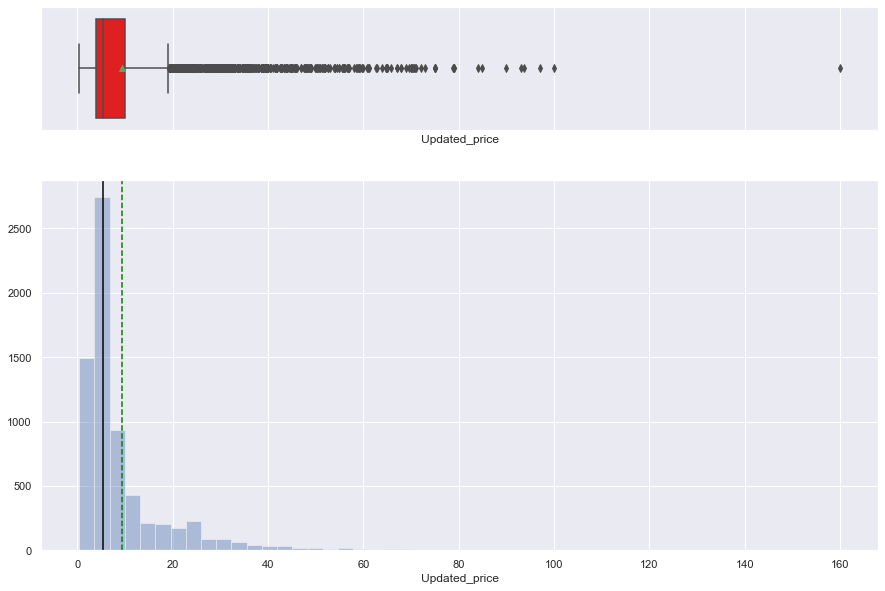

In [39]:
histogram_boxplot(finished_data["Updated_price"]);

#### Observations
* The mean is less than the median which results in a positive or right skewed distribution.
* The average updated price is 9.42 Lakhs (1 Lakh = 100, 000)
* There are a considerable amount of data points significantly greater than the 75% quartile and therefore outside of the boxplot's whiskers which will be treated in section ...

#### New car Price

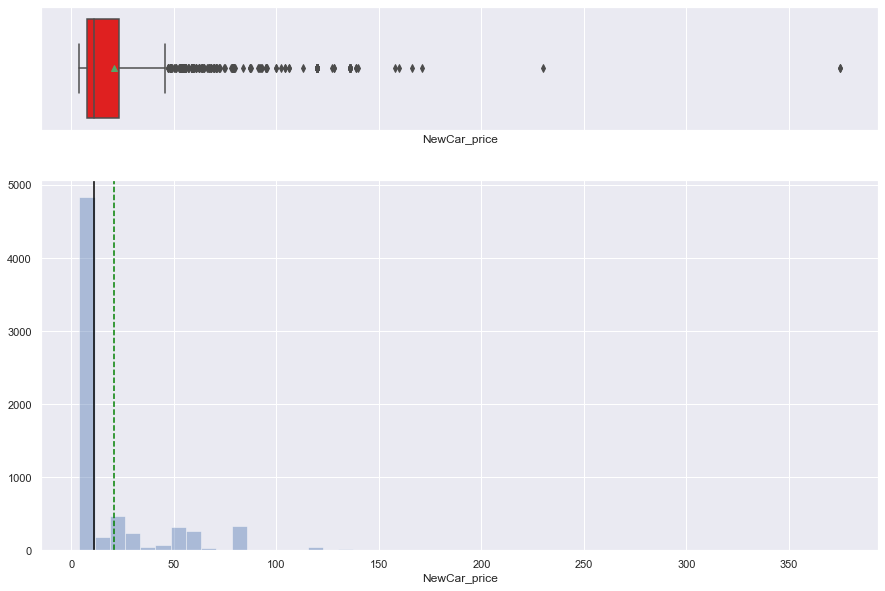

In [40]:
histogram_boxplot(finished_data["NewCar_price"]);

#### Observations
* Same as the "Updated_price: the mean is less than the median which results in a positive or right skewed distribution.
* The average New Car price is 21.00 Lakhs (1 Lakh = 100, 000) which makes sense because a new car should be more expensive than a previously owned car.
* There are a considerable amount of data points significantly greater than the 75% quartile and therefore outside of the boxplot's whiskers which will be treated in section ...

#### Power_in_Bhp

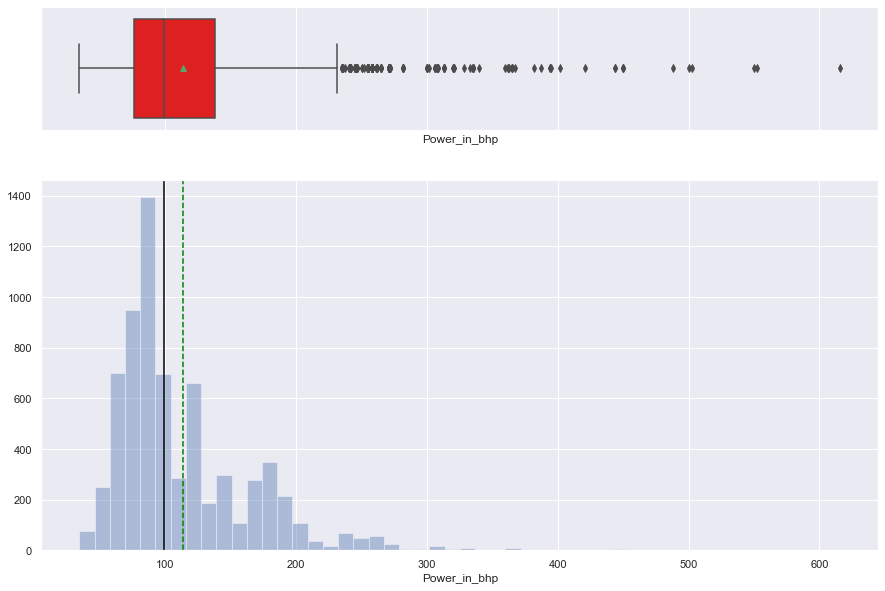

In [41]:
histogram_boxplot(finished_data["Power_in_bhp"]);

#### Observations
* This distribuiton is more uniform but still right skewed.
* There are a considerable amount of data points significantly greater than the 75% quartile and therefore outside of the boxplot's whiskers which will be treated in section ...

#### Engine_in_cc

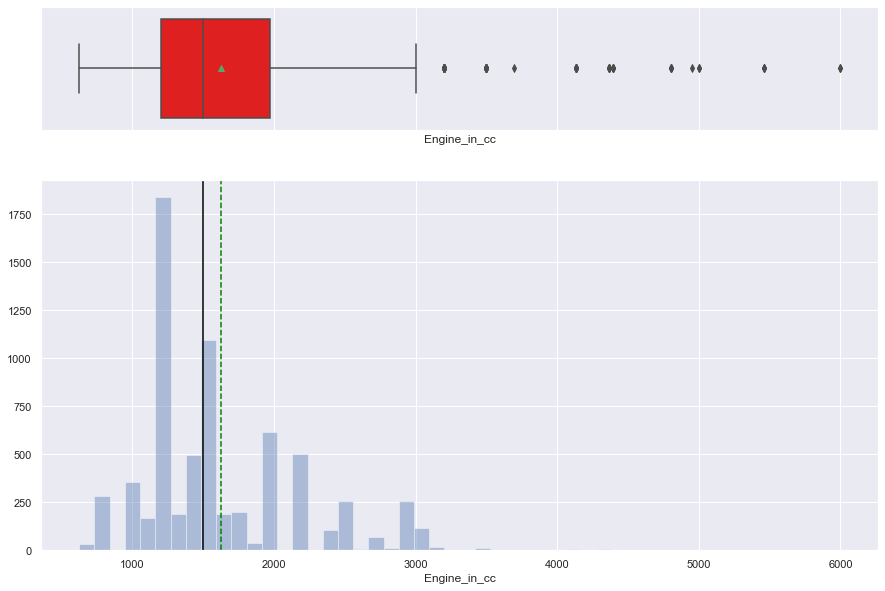

In [42]:
histogram_boxplot(finished_data["Engine_in_cc"]);

#### Observations
* This distribuiton is more uniform but still sligly right skewed because the mean (1622) is greater than the median (1496)
* There are some data points significantly greater than the 75% quartile and therefore outside of the boxplot's whiskers which will be treated in section ...

#### Mileage_in_Kmpl

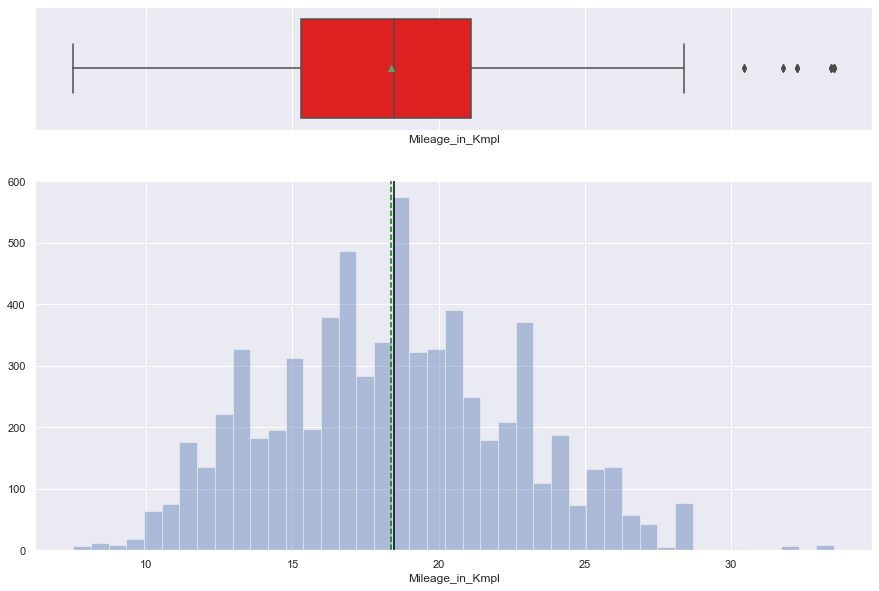

In [43]:
 histogram_boxplot(finished_data["Mileage_in_Kmpl"]);

#### Observations
* Normally distributed
* The average value is 18.3 Kmpl

#### Year

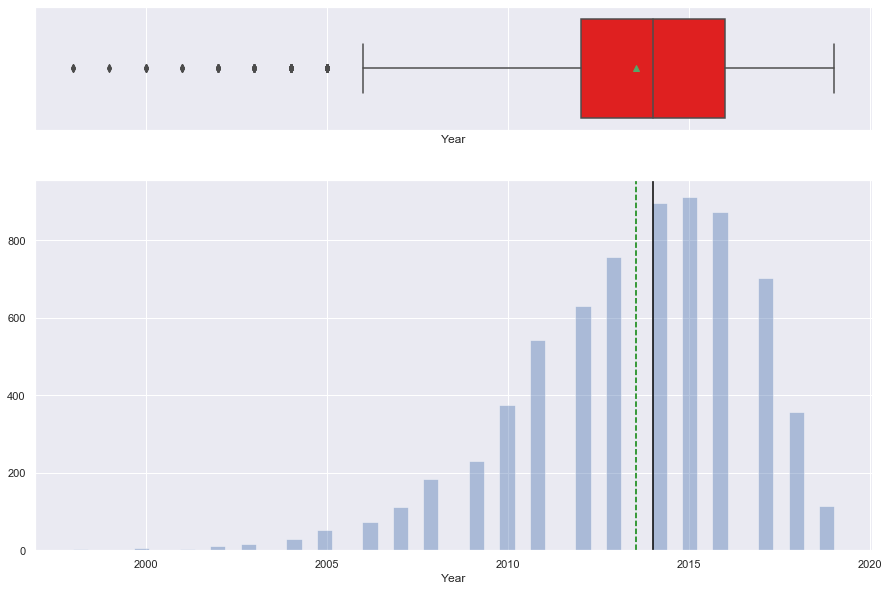

In [44]:
 histogram_boxplot(finished_data["Year"]);

#### Observations
* Negative or left skewed distribution. This means that as the time passes there are more used cars in the market
* The minimum year is 1998 an the maximum is 2019

## 3.1 Multivariate Data Analysis

#### Updated Price vs New Car Price

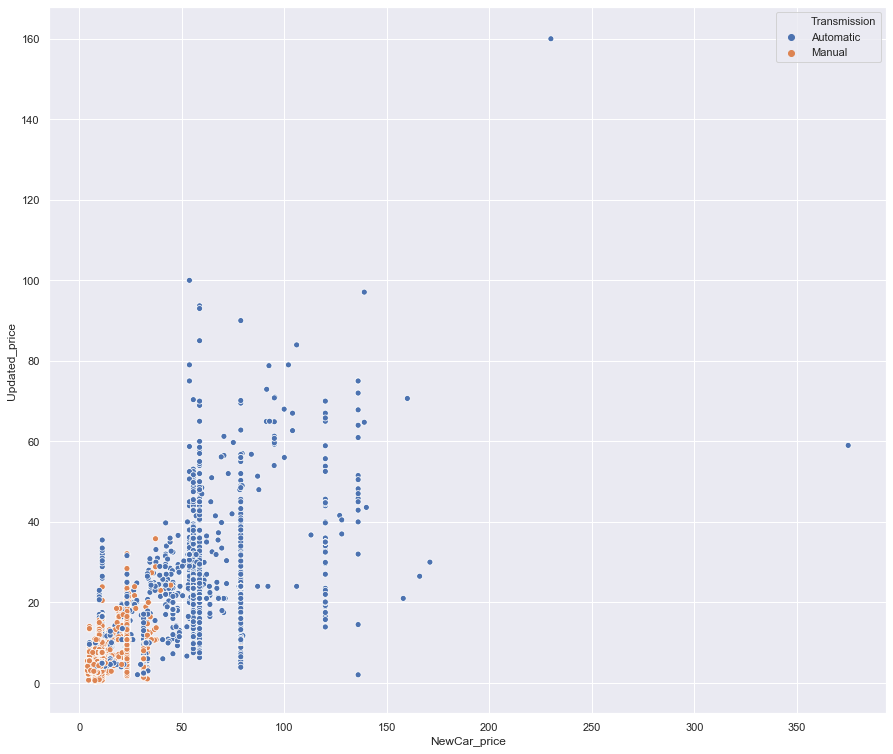

In [45]:
# Lets look visualize the relationship 
plt.figure(figsize=(15,13))
sns.scatterplot(y='Updated_price', x='NewCar_price', hue='Transmission', data=finished_data);

#### Observations
* These variables appear to have a positive association.
* Manual Cars are less expensive than Automatic cars

#### Power in Bhp vs Updated Car Price

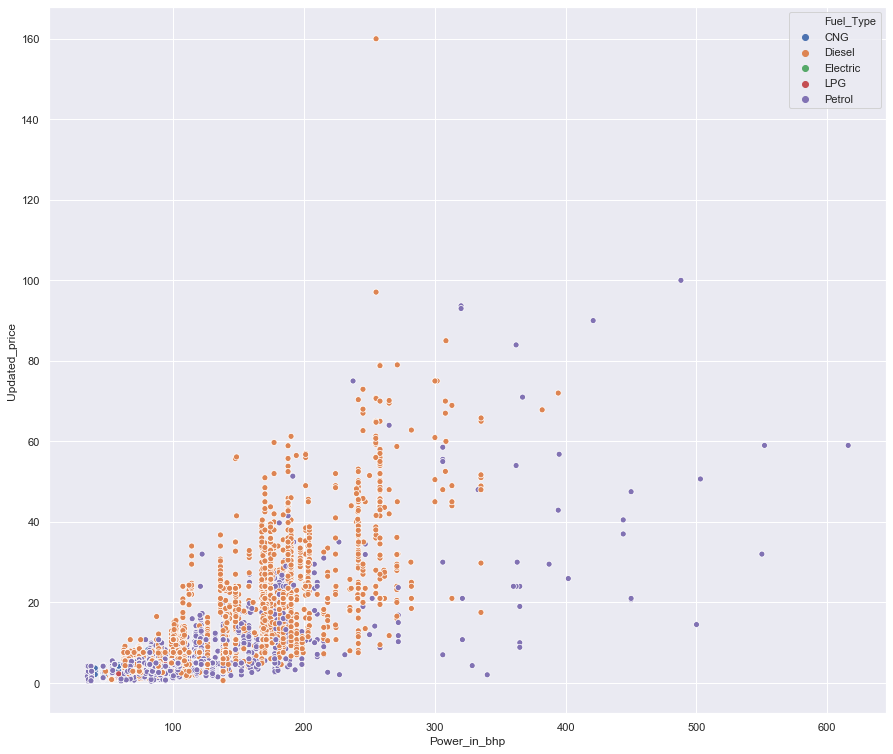

In [46]:
# Lets look visualize the relationship 
plt.figure(figsize=(15,13))
sns.scatterplot(y='Updated_price', x='Power_in_bhp', hue='Fuel_Type', data=finished_data);

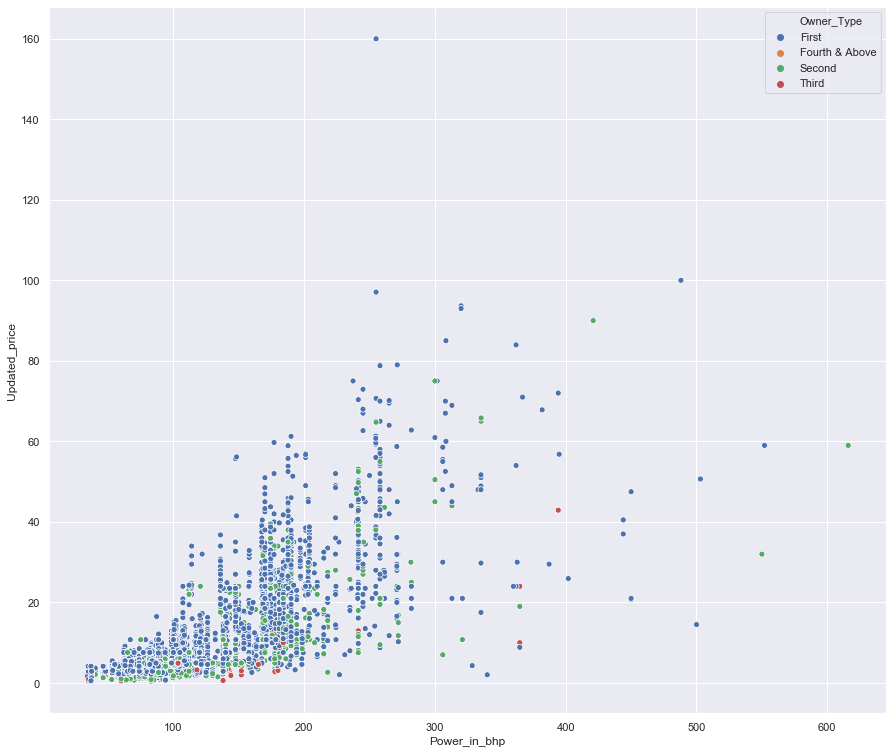

In [47]:
# Lets look visualize the relationship 
plt.figure(figsize=(15,13))
sns.scatterplot(y='Updated_price', x='Power_in_bhp', hue='Owner_Type', data=finished_data);

#### Observations
* These variables appear to have a positive association.
* The mayority of the cars have diesel fuel type
* The mayority of the cars in with Petrol fuel are less expensive. However, there are models with high power in bhp that are very expensive.
* The higer the power in bhp the higher the price.
* The mayority of the cars are first and second owner cars and are more expensive than thrird and four and above cars

#### Engine in cc vs Updated Car Price

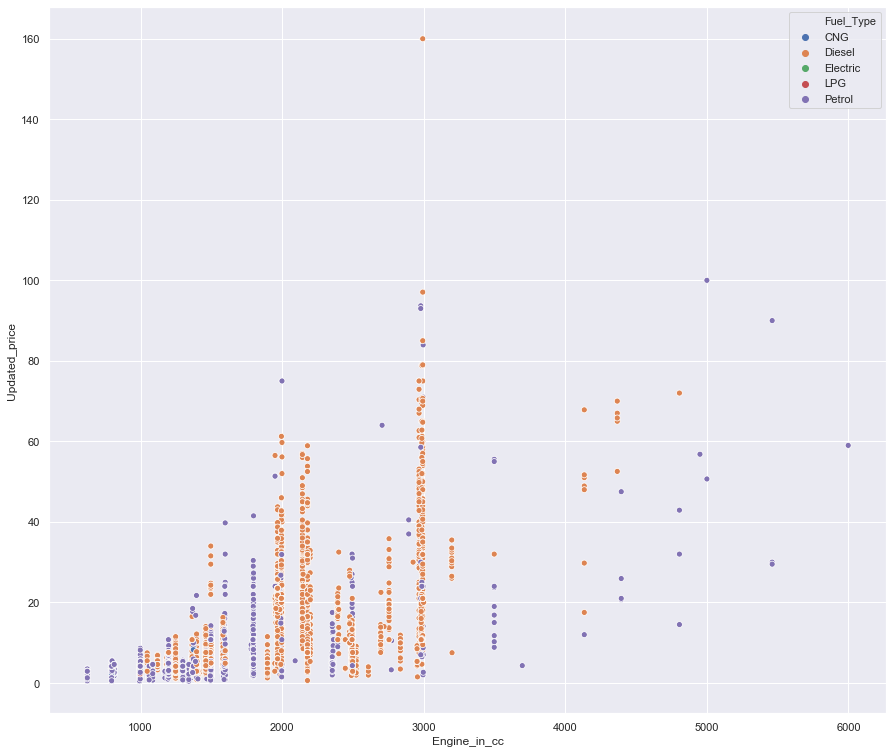

In [48]:
# Lets look visualize the relationship 
plt.figure(figsize=(15,13))
sns.scatterplot(y='Updated_price', x='Engine_in_cc', hue='Fuel_Type', data=finished_data);

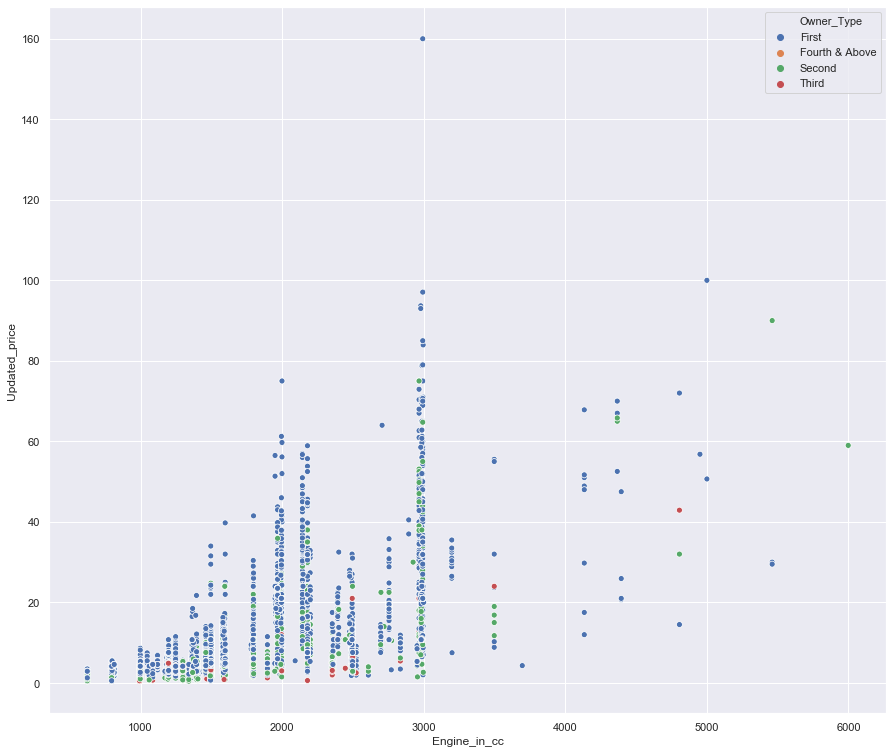

In [49]:
# Lets look visualize the relationship 
plt.figure(figsize=(15,13))
sns.scatterplot(y='Updated_price', x='Engine_in_cc', hue='Owner_Type', data=finished_data);

#### Observations
* The mayority of the data points correspond to 2000 abd 3000 Engines in cc.
* The mayority of the cars have diesel fuel type
* The higer the engine in cc, the higher the price 

#### Year vs Updated Car and new car Price 

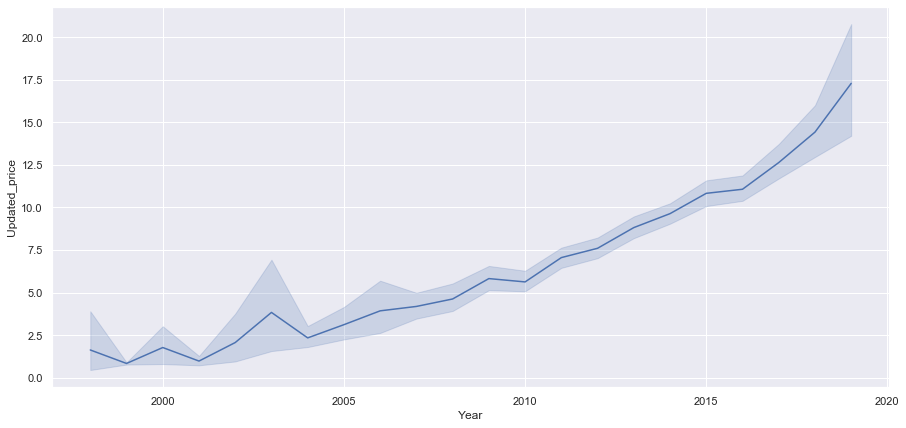

In [50]:
# Price variance per year
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Updated_price',
             data=finished_data);

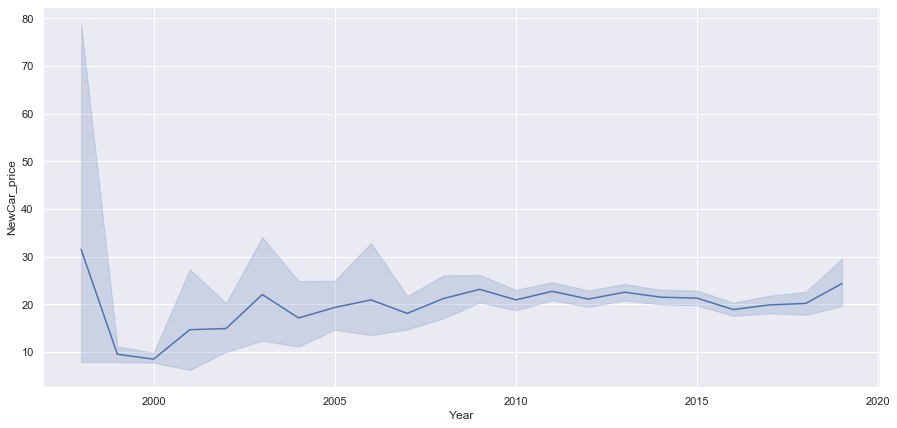

In [51]:
# Price variance per year
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='NewCar_price',
             data=finished_data);

#### Observations
* The price of previously owned cars increases per year.
* The price of new cars is controled and therefore it tends to be stable through the years.

## 4 Correlations

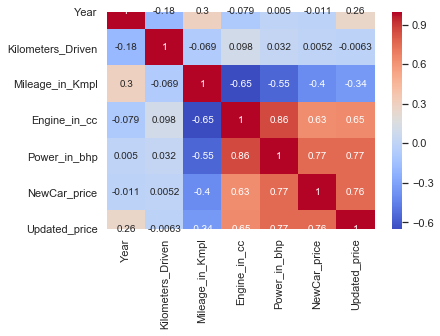

In [52]:
sns.heatmap(finished_data.corr(), annot=True,cmap='coolwarm');#highlevel view of all numerical variables

#### Observations
* Engine_in_cc is positively corelated with Power in bhp (0.86). This means that the power the hiher the engine
* The Power in Bhp has a strong (0.77) repation with both newCar_Price and Upated Price. This means that the higher the power in Bhp the higer the price
* There is a positive relation with updated price and new car price. This means that the hiher the price of the new car (NewCar-Price), the higher the price of the previously owned car.

## 5 Outliers

### 5.1 Visualizing Outliers

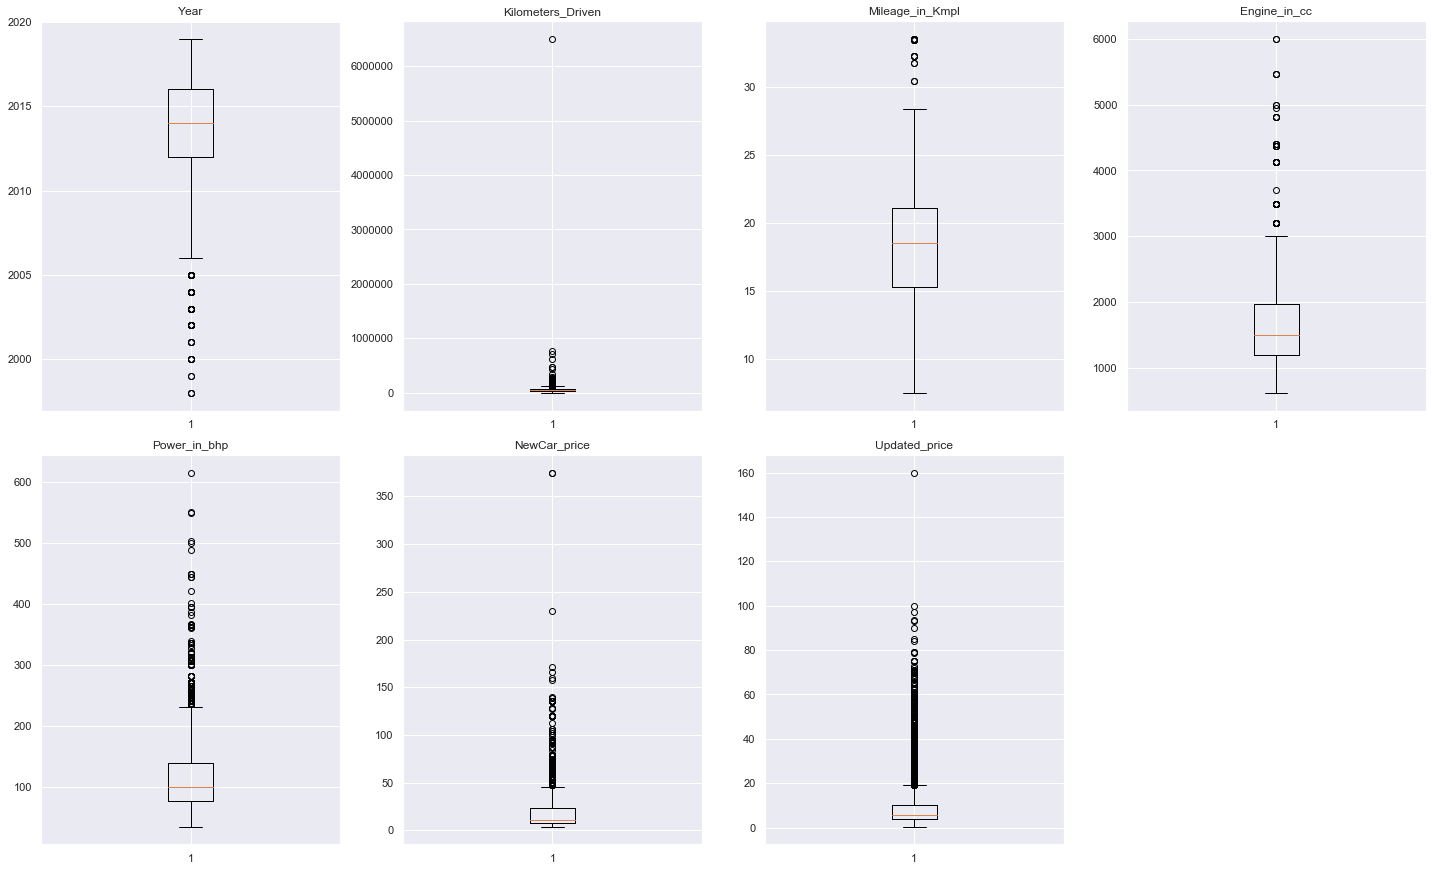

In [53]:
plt.figure(figsize=(20,30))

numeric_columns = finished_data.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(finished_data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)
#plt.xlabel(size=12)
#plt.ylabel(size=12)
plt.show()

#### Observations
* The outliers of the following variables will be removed from the dataset: Updated_price, NewCar_Price, Year, and Engine in cc

### 5.2 Dealing with Outliers

#### 5.2.1 Part 1 - Flooring and Capping

In [54]:
q=finished_data["Updated_price"].quantile(0.99) # Removing 1% of the upper data
data1=finished_data[finished_data["Updated_price"]<q]

In [55]:
q=data1["NewCar_price"].quantile(0.99)# Removing 1% of the upper data
data2=data1[data1["NewCar_price"]<q]

In [56]:
q=data2["Year"].quantile(0.01)# Removing 1% of the lower data
data3=data2[data2["Year"]>q]

In [57]:
q=data3["Engine_in_cc"].quantile(0.99)# Removing 1% of the upper data
data4=data3[data3["Engine_in_cc"]<q]

In [58]:
data_cleaned = data4.reset_index(drop=True)# resets the indexses of the replaced rows

#### Checking the data

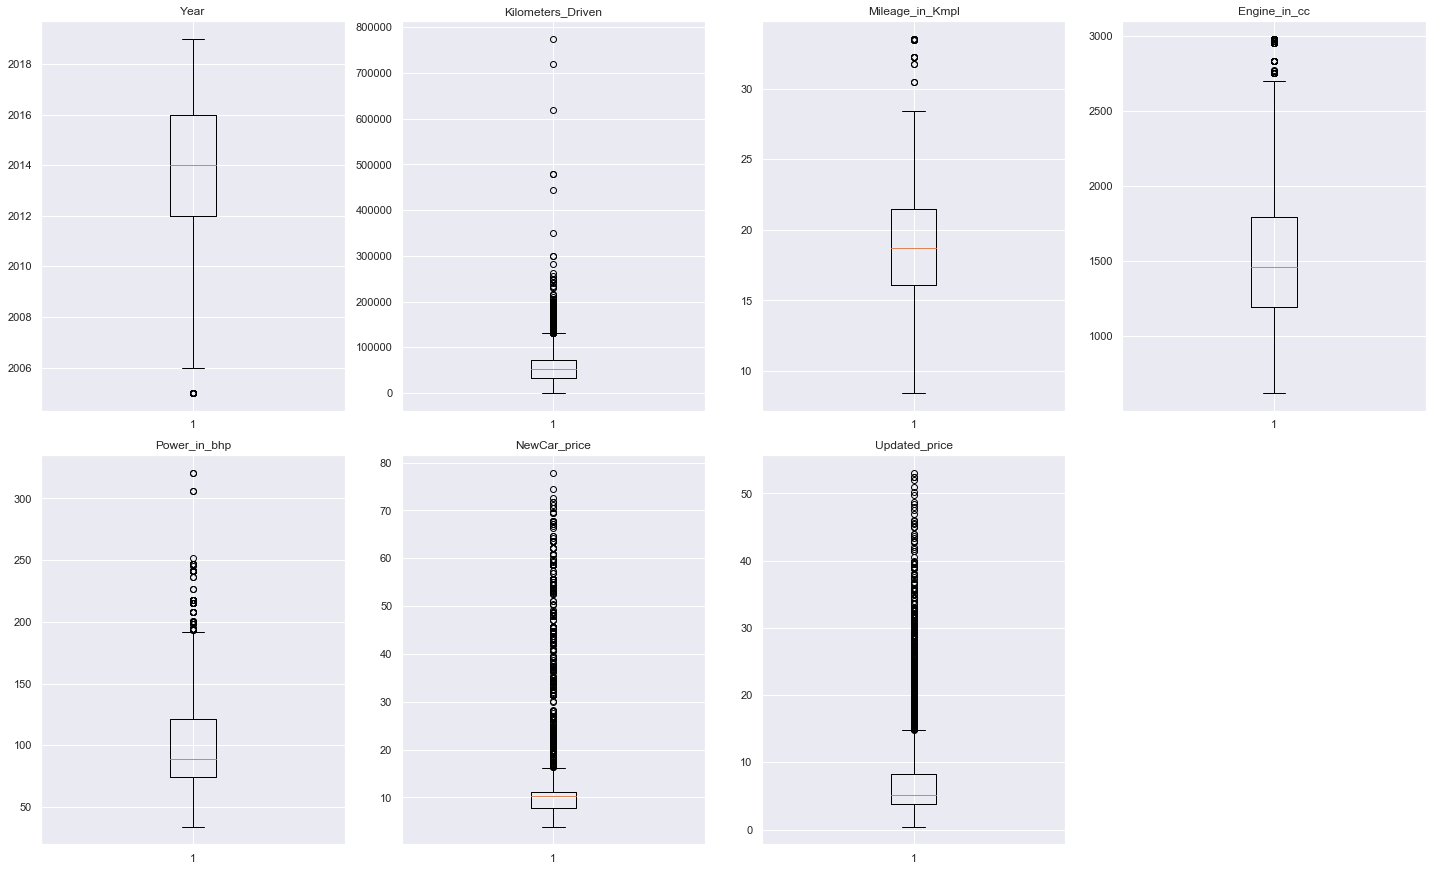

In [59]:
plt.figure(figsize=(20,30))

numeric_columns = data_cleaned.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(data_cleaned[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)
#plt.xlabel(size=12)
#plt.ylabel(size=12)
plt.show()

#### Observations
* The outliers were removed as shown in the charts

#### 5.1.2 Part 2 - Log Transformation

##### Log transformation scales the data to a predetermined scale (0-1). This decreases the scale of the distribution and this is why is very effective in highly skewed data

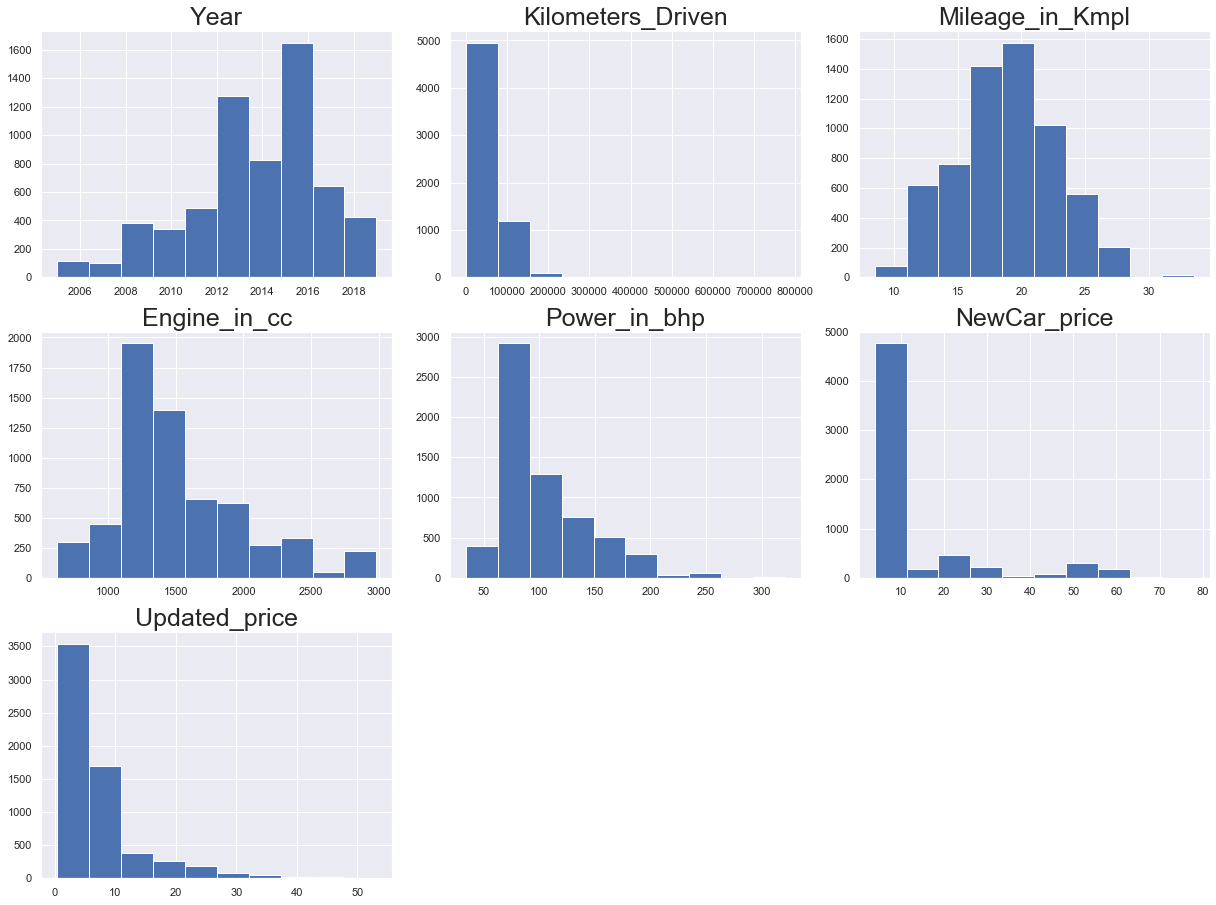

In [60]:
from scipy.stats import norm # Plot the data before trasformation
all_col = data_cleaned.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(data_cleaned[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

In [61]:
Kilometers_Driven=np.log(data_cleaned["Kilometers_Driven"]) # Applying log transformation (reducing the scale of the data)
data_cleaned["Log_Kilometers_Driven"] = Kilometers_Driven

In [62]:
Power_in_bhp=np.log(data_cleaned["Power_in_bhp"]) # Applying log transformation (reducing the scale of the data)
data_cleaned["Log_Power_in_bhp"] = Kilometers_Driven

In [63]:
NewCar_price=np.log(data_cleaned["NewCar_price"]) # Applying log transformation (reducing the scale of the data)
data_cleaned["Log_NewCar_price"] = NewCar_price

In [64]:
Updated_price=np.log(data_cleaned["Updated_price"]) # Applying log transformation (reducing the scale of the data)
data_cleaned["Log_Updated_price"] = Updated_price

In [65]:
#Removing the original columns
data_cleaned.drop(["Kilometers_Driven","Power_in_bhp","NewCar_price","Updated_price","Seats"],axis=1,inplace=True)

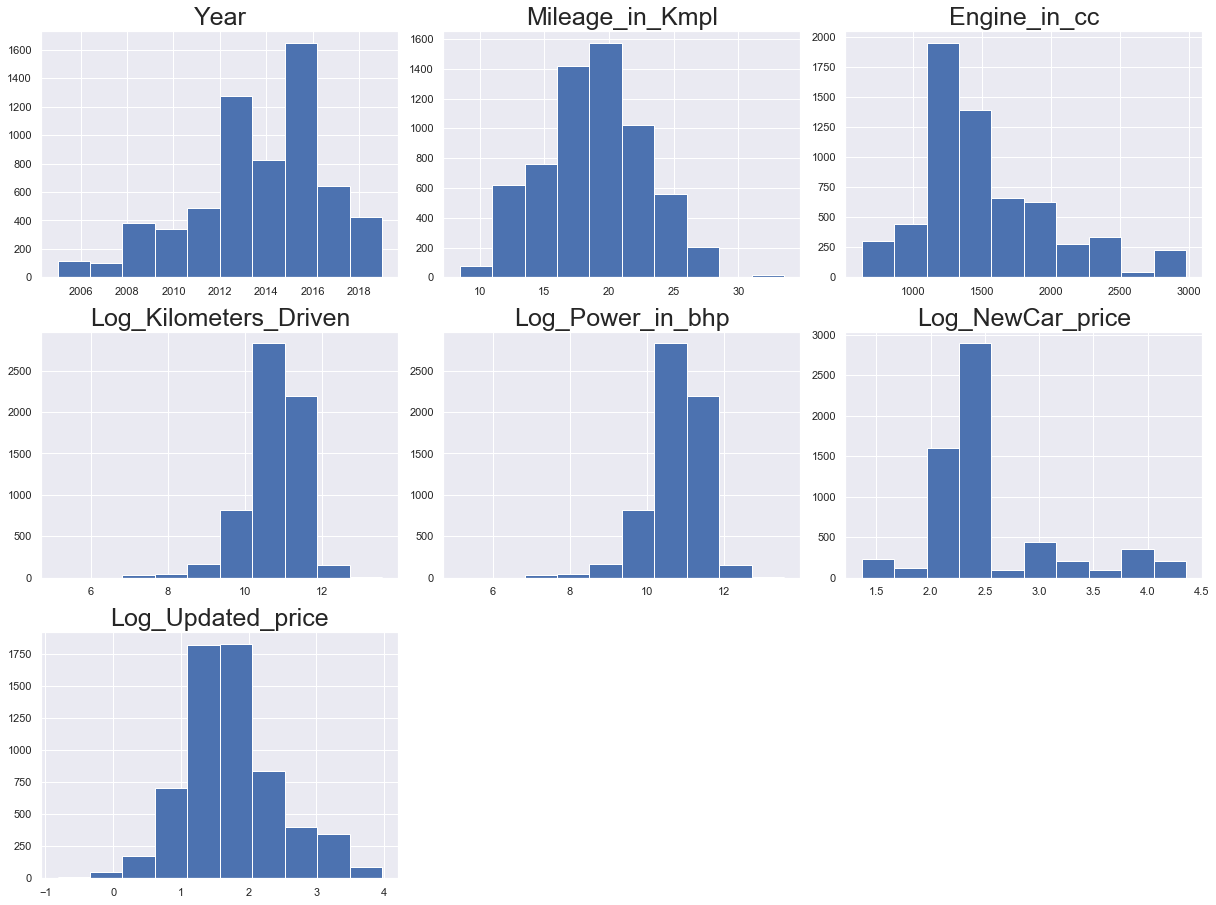

In [66]:
from scipy.stats import norm #Plotting the data after log transformation
all_col = data_cleaned.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(data_cleaned[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

It is logical that year and mileage will be correlated, newer the car, lower its mileage.

In [67]:
data_cleaned.describe(include='all')

,Brand_Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage_in_Kmpl,Engine_in_cc,Log_Kilometers_Driven,Log_Power_in_bhp,Log_NewCar_price,Log_Updated_price
count,6253,6253,6253.000000,6253,6253,6253,6253.000000,6253.000000,6253.000000,6253.000000,6253.000000,6253.000000
unique,22,11,NaN,4,2,4,NaN,NaN,NaN,NaN,NaN,NaN
top,Maruti,Mumbai,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN,NaN
freq,1371,828,NaN,3222,4810,5216,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2013.635855,NaN,NaN,NaN,18.802887,1535.188549,10.749965,10.749965,2.511707,1.749897
std,NaN,NaN,2.946794,NaN,NaN,NaN,4.040974,494.599684,0.724616,0.724616,0.618425,0.701031
min,NaN,NaN,2005.000000,NaN,NaN,NaN,8.450000,624.000000,5.141664,5.141664,1.363537,-0.820981
25%,NaN,NaN,2012.000000,NaN,NaN,NaN,16.070000,1197.000000,10.417059,10.417059,2.063058,1.335001
50%,NaN,NaN,2014.000000,NaN,NaN,NaN,18.700000,1461.000000,10.878047,10.878047,2.328253,1.648659
75%,NaN,NaN,2016.000000,NaN,NaN,NaN,21.500000,1798.000000,11.192252,11.192252,2.415914,2.104134


## 6 Model Building

### 6.1 Linear Regresion - Defining depending and independent variables

#Defining X and y variables
X = data_cleaned.drop(['Log_Updated_price'], axis=1)#Independent variable
y = data_cleaned[['Log_Updated_price']] # Dependent variable

print(X.head())
print(y.head())

### 6.2 Data Clean - Get Dummies

In [68]:
data_cleaned.dtypes

Brand_Name               category
Location                 category
Year                        int64
Fuel_Type                category
Transmission             category
Owner_Type               category
Mileage_in_Kmpl           float64
Engine_in_cc              float64
Log_Kilometers_Driven     float64
Log_Power_in_bhp          float64
Log_NewCar_price          float64
Log_Updated_price         float64
dtype: object

In [69]:
data_cleaned.Brand_Name.value_counts()

Maruti           1371
Hyundai          1269
Honda             727
Toyota            474
Volkswagen        373
Mahindra          325
Ford              322
Audi              269
Tata              222
BMW               217
Skoda             195
Renault           170
Nissan            112
Fiat               32
Mitsubishi         32
Mini               31
Volvo              28
Jaguar             27
Jeep               19
Mercedes-Benz      19
Datsun             17
Land                2
Chevrolet           0
Force               0
Bentley             0
Lamborghini         0
Hindustan           0
ISUZU               0
Isuzu               0
OpelCorsa           0
Porsche             0
Smart               0
Ambassador          0
Name: Brand_Name, dtype: int64

In [70]:
data_cleaned.Location.value_counts()

Mumbai        828
Hyderabad     759
Kochi         672
Pune          653
Coimbatore    647
Kolkata       582
Delhi         580
Chennai       488
Jaipur        443
Bangalore     349
Ahmedabad     252
Name: Location, dtype: int64

In [71]:
data_cleaned.Owner_Type.value_counts()

First             5216
Second             933
Third               95
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [72]:
data_cleaned.Fuel_Type.value_counts()

Diesel      3222
Petrol      2958
CNG           61
LPG           12
Electric       0
Name: Fuel_Type, dtype: int64

In [73]:
data_cleaned.Transmission.value_counts()

Manual       4810
Automatic    1443
Name: Transmission, dtype: int64

In [74]:
data_with_dummies = pd.get_dummies(data_cleaned,drop_first=True)# Create dumies.
data_with_dummies.head()

,Year,Mileage_in_Kmpl,Engine_in_cc,Log_Kilometers_Driven,Log_Power_in_bhp,Log_NewCar_price,Log_Updated_price,Brand_Name_Audi,Brand_Name_BMW,Brand_Name_Bentley,Brand_Name_Chevrolet,Brand_Name_Datsun,Brand_Name_Fiat,Brand_Name_Force,Brand_Name_Ford,Brand_Name_Hindustan,Brand_Name_Honda,Brand_Name_Hyundai,Brand_Name_ISUZU,Brand_Name_Isuzu,Brand_Name_Jaguar,Brand_Name_Jeep,Brand_Name_Lamborghini,Brand_Name_Land,Brand_Name_Mahindra,Brand_Name_Maruti,Brand_Name_Mercedes-Benz,Brand_Name_Mini,Brand_Name_Mitsubishi,Brand_Name_Nissan,Brand_Name_OpelCorsa,Brand_Name_Porsche,Brand_Name_Renault,Brand_Name_Skoda,Brand_Name_Smart,Brand_Name_Tata,Brand_Name_Toyota,Brand_Name_Volkswagen,Brand_Name_Volvo,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,26.60,998.0,11.184421,11.184421,2.063058,0.559616,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,2015,19.67,1582.0,10.621327,10.621327,2.276241,2.525729,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,2011,18.20,1199.0,10.736397,10.736397,2.152924,1.504077,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,2012,20.77,1248.0,11.373663,11.373663,2.063058,1.791759,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,2013,15.20,1968.0,10.613246,10.613246,4.018363,2.875822,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [75]:
#The "drop" comand excludes the values in the brand and Fuel type = 0 because these values do not bring anything to the model
data_with_dummies.drop(["Brand_Name_Chevrolet","Brand_Name_Force","Brand_Name_Bentley","Brand_Name_Lamborghini","Brand_Name_Hindustan","Brand_Name_ISUZU","Brand_Name_Isuzu","Brand_Name_OpelCorsa","Brand_Name_Porsche","Brand_Name_Smart","Fuel_Type_Electric"],axis=1,inplace=True)

In [76]:
data_with_dummies.columns

Index(['Year', 'Mileage_in_Kmpl', 'Engine_in_cc', 'Log_Kilometers_Driven',
       'Log_Power_in_bhp', 'Log_NewCar_price', 'Log_Updated_price',
       'Brand_Name_Audi', 'Brand_Name_BMW', 'Brand_Name_Datsun',
       'Brand_Name_Fiat', 'Brand_Name_Ford', 'Brand_Name_Honda',
       'Brand_Name_Hyundai', 'Brand_Name_Jaguar', 'Brand_Name_Jeep',
       'Brand_Name_Land', 'Brand_Name_Mahindra', 'Brand_Name_Maruti',
       'Brand_Name_Mercedes-Benz', 'Brand_Name_Mini', 'Brand_Name_Mitsubishi',
       'Brand_Name_Nissan', 'Brand_Name_Renault', 'Brand_Name_Skoda',
       'Brand_Name_Tata', 'Brand_Name_Toyota', 'Brand_Name_Volkswagen',
       'Brand_Name_Volvo', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Fourth & Above',
     

In [77]:
data_with_dummies=data_with_dummies[['Log_Updated_price','Year', 'Mileage_in_Kmpl', 'Engine_in_cc', 'Log_Kilometers_Driven',
       'Log_Power_in_bhp', 'Log_NewCar_price',
       'Brand_Name_Audi', 'Brand_Name_BMW', 'Brand_Name_Datsun',
       'Brand_Name_Fiat', 'Brand_Name_Ford', 'Brand_Name_Honda',
       'Brand_Name_Hyundai', 'Brand_Name_Jaguar', 'Brand_Name_Jeep',
       'Brand_Name_Land', 'Brand_Name_Mahindra', 'Brand_Name_Maruti',
       'Brand_Name_Mercedes-Benz', 'Brand_Name_Mini', 'Brand_Name_Mitsubishi',
       'Brand_Name_Nissan', 'Brand_Name_Renault', 'Brand_Name_Skoda',
       'Brand_Name_Tata', 'Brand_Name_Toyota', 'Brand_Name_Volkswagen',
       'Brand_Name_Volvo', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third']]

### 6.2.1 Defining depending and independent variable in the new data set

In [78]:
#Defining X and y variables
X = data_with_dummies.drop(['Log_Updated_price'], axis=1)#Independent variable
y = data_with_dummies[['Log_Updated_price']] # Dependent variable


In [79]:
from sklearn.model_selection import train_test_split # Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 30% - 70% Distribution

### 6.2 Regresion itself

In [80]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
print("Intercepts:",reg.intercept_)
print(" ")
print("Coeffecients:",reg.coef_)
pred = reg.predict(X_test)
print(" ")
print("Predicted values",pred)

Intercepts: [-211.74296078]
 
Coeffecients: [[ 1.05571040e-01 -6.86107338e-03  5.43025941e-04 -1.43702601e-02
  -1.43702601e-02  2.32840946e-01  3.69953343e-01  3.06065673e-01
  -4.57311274e-01 -3.97320346e-01 -2.49361553e-01 -1.16534854e-01
  -1.27918958e-01  5.59172579e-01  2.48139325e-01  6.90913693e-01
  -2.64681995e-01 -1.09129428e-01  4.43871452e-01  7.18382035e-01
  -3.83078814e-01 -2.06087853e-01  1.82560148e-03 -3.00412188e-01
  -5.88018033e-01 -1.47017858e-01 -1.92406578e-01  2.00956030e-01
   1.58327691e-01  1.18174098e-02  1.01223815e-01 -4.00400172e-02
   7.54069753e-02 -4.38313297e-02 -3.20151553e-03 -1.87510414e-01
  -1.84701911e-02 -1.46275392e-02  2.01512033e-01  6.24589274e-02
   6.43887378e-02 -9.90307328e-02  1.05946693e-01 -6.82502948e-02
  -1.78035538e-01]]
 
Predicted values [[1.407448  ]
 [1.3859768 ]
 [1.53090289]
 ...
 [1.77660455]
 [2.37143413]
 [2.95726728]]


Summary Table

In [82]:
reg_summary= pd.DataFrame(X.columns.values, columns=["Features"])
reg_summary["Weights"]=reg.coef_.T
reg_summary

,Features,Weights
0,Year,0.105571
1,Mileage_in_Kmpl,-0.006861
2,Engine_in_cc,0.000543
3,Log_Kilometers_Driven,-0.014370
4,Log_Power_in_bhp,-0.014370
5,Log_NewCar_price,0.232841
6,Brand_Name_Audi,0.369953
7,Brand_Name_BMW,0.306066
8,Brand_Name_Datsun,-0.457311
9,Brand_Name_Fiat,-0.397320


### lets look at model performances

In [83]:
# Mean Absolute Error on test
mean_absolute_error(y_test, pred)

0.2153347621842822

The mean absolute error (MAE) is the simplest regression error metric to understand. We'll calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. We then take the average of all these residuals. Effectively, MAE describes the typical magnitude of the residuals.

In [84]:
# RMSE on test data
mean_squared_error(y_test, pred)**0.5

0.283756922051199

The root mean square error (RMSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. And then takes the square root of the value.

In [85]:
# R2 Squared: on test
r2_score(y_test, pred)

0.8397423553539501

R^2 (coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

R^2 value is 0.84 which means that in this model independent variables are able to explain 84% of variances in dependent variable

## Testing

In [86]:
y_hat_test = reg.predict(X_test)
y_hat_test

array([[1.407448  ],
       [1.3859768 ],
       [1.53090289],
       ...,
       [1.77660455],
       [2.37143413],
       [2.95726728]])

In [87]:
# R2 Squared: on train and test
print('r2 score on train data :', r2_score(y_train, pred))
print('r2 score on test data :', r2_score(y_test, y_hat_test))

ValueError: Found input variables with inconsistent numbers of samples: [4377, 1876]

# Conclusion

The Training and testing scores are around 84% and both scores are comparable, hence the model is a good fit.

R2_score is 0.84, that explains 84% of total variation in the dataset. So, overall the model is very satisfactory.

# Add-on: **statsmodels**

- Here is the complete syntax to perform the linear regression in Python using statsmodels.
- Statsmodels is a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration

In [ ]:
X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

# Checking the Linear Regression Assumptions¶

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))